In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_bank = pd.read_csv("bank-full.csv",';')
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
df_bank.shape

(45211, 17)

This dataset have 45211 rows and 17 variables.

In [4]:
df_bank.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [5]:
df_bank.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
df_bank["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [7]:
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

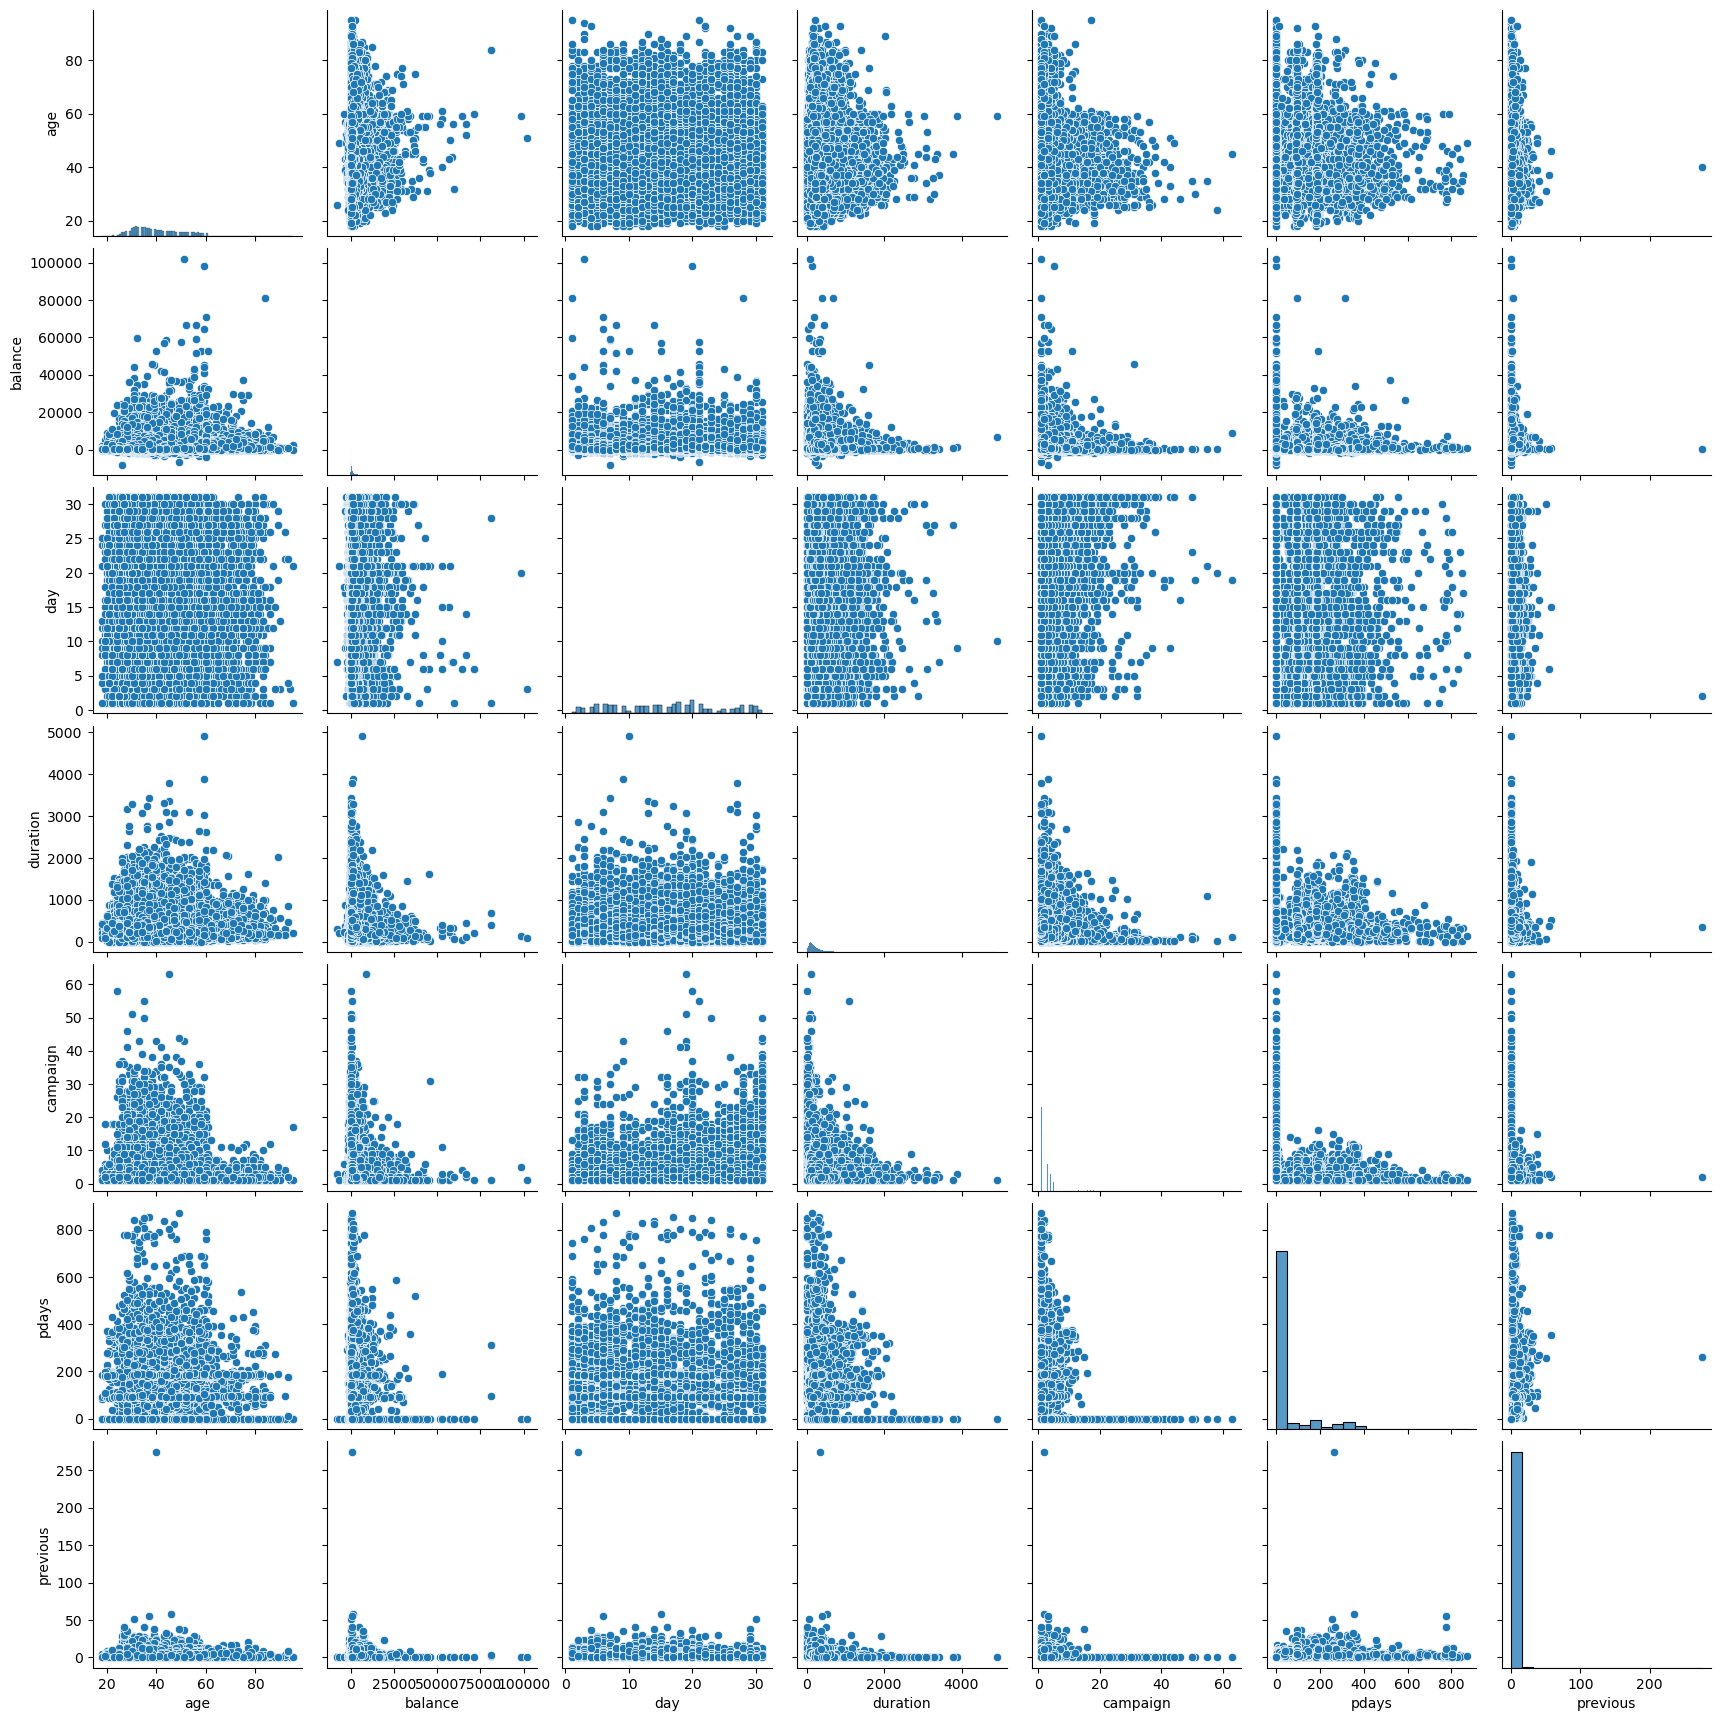

In [8]:
sns.pairplot(df_bank)

<Axes: >

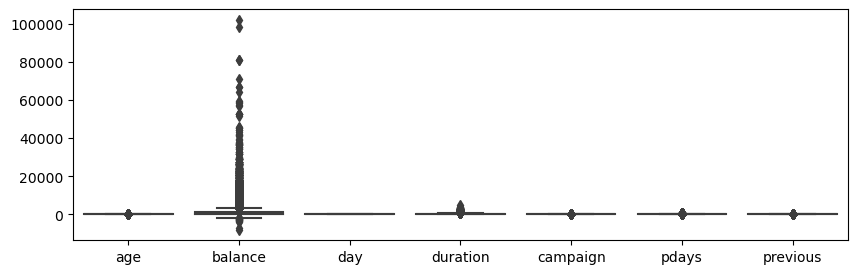

In [9]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df_bank)

In [10]:
Q1 = df_bank.quantile(0.25)
Q3 = df_bank.quantile(0.75)
IQR = Q3 - Q1
df_bank = df_bank[~((df_bank < (Q1 - 1.5 * IQR)) | (df_bank > (Q3 + 1.5 * IQR))).any(axis=1)]
df_bank.shape

(28193, 17)

<Axes: >

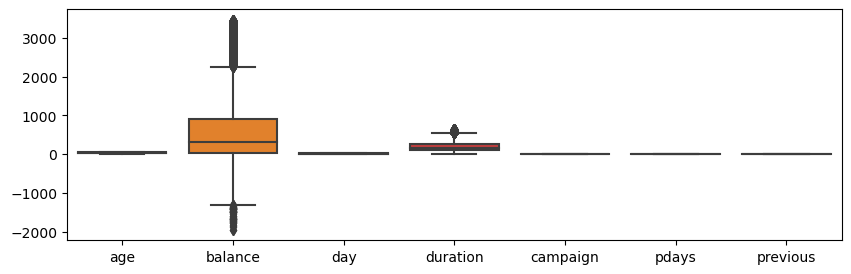

In [11]:
plt.figure(figsize=(10,3))
sns.boxplot(data=df_bank)

In [12]:
df_bank.y.replace(to_replace=['yes','no'], value = [1,0],inplace = True)

In [13]:
df_bank["y"].value_counts()

0    26594
1     1599
Name: y, dtype: int64

In [14]:
df_bank = df_bank[['y','age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
                   'loan', 'contact', 'day', 'month','duration','campaign', 'pdays','previous', 'poutcome']]

In [15]:
df_bank = pd.get_dummies(df_bank,columns=['job', 'marital', 'education', 'default', 'housing','loan', 'contact','month', 'poutcome'])

In [16]:
df_bank.head(5)

,y,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,0,58,2143,5,261,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,44,29,5,151,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,33,2,5,76,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,47,1506,5,92,1,-1,0,0,1,...,0,0,0,0,0,1,0,0,0,1
4,0,33,1,5,198,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


<h3> Model Building </h3>

In [17]:
X = df_bank.iloc[:,1::]
Y = df_bank.iloc[:,0]

In [18]:
X.head(2)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [20]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [21]:
y_pred = model.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
y_pred_df = pd.DataFrame({'Actual':Y,'Predicted_values':model.predict(X)})
y_pred_df.head()

,Actual,Predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [23]:
y_pred_df["Actual"].value_counts()

0    26594
1     1599
Name: Actual, dtype: int64

In [24]:
y_pred_df["Predicted_values"].value_counts()

0    27911
1      282
Name: Predicted_values, dtype: int64

In [25]:
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[26448   146]
 [ 1463   136]]


In [26]:
round(accuracy_score(Y,y_pred),2)

0.94

In [27]:
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97     26594
           1       0.48      0.09      0.14      1599

    accuracy                           0.94     28193
   macro avg       0.71      0.54      0.56     28193
weighted avg       0.92      0.94      0.92     28193

